# Exploratory Data Analysis (EDA) - Recipe Recommender
This notebook explores the recipes and reviews datasets to understand the distributions and patterns.

In [1]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Add project root to path
sys.path.append('..')

from src.data_loader import DataLoader

sns.set_theme(style="whitegrid")

In [2]:
import os
path = 'D:\\Recipe-Recommender\\data\\raw\\recipes.parquet'
size_bytes = os.path.getsize(path)
print(f"{size_bytes/1024**3:.2f} GB")

0.17 GB


In [3]:
path = 'D:\\Recipe-Recommender\\data\\raw\\reviews.parquet'
size_bytes = os.path.getsize(path)
print(f"{size_bytes/1024**3:.2f} GB")

0.16 GB


## Import data

In [4]:
loader = DataLoader(data_dir="../data/raw")
recipes = loader.load_recipes()
reviews = loader.load_reviews()

print(f"Recipes shape: {recipes.shape}")
print(f"Reviews shape: {reviews.shape}")

Recipes shape: (522517, 28)
Reviews shape: (1401982, 8)



--- Recipes Schema ---
Schema({'RecipeId': Float64, 'Name': String, 'AuthorId': Int32, 'AuthorName': String, 'CookTime': String, 'PrepTime': String, 'TotalTime': String, 'DatePublished': Datetime(time_unit='us', time_zone='UTC'), 'Description': String, 'Images': List(String), 'RecipeCategory': String, 'Keywords': List(String), 'RecipeIngredientQuantities': List(String), 'RecipeIngredientParts': List(String), 'AggregatedRating': Float64, 'ReviewCount': Int32, 'Calories': Float64, 'FatContent': Float64, 'SaturatedFatContent': Float64, 'CholesterolContent': Float64, 'SodiumContent': Float64, 'CarbohydrateContent': Float64, 'FiberContent': Float64, 'SugarContent': Float64, 'ProteinContent': Float64, 'RecipeServings': Int32, 'RecipeYield': String, 'RecipeInstructions': List(String)})

--- Sample Recipes ---
shape: (5, 28)
┌──────────┬────────────┬──────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ RecipeId ┆ Name       ┆ AuthorId ┆ AuthorNam ┆ … ┆ ProteinCo ┆ Reci

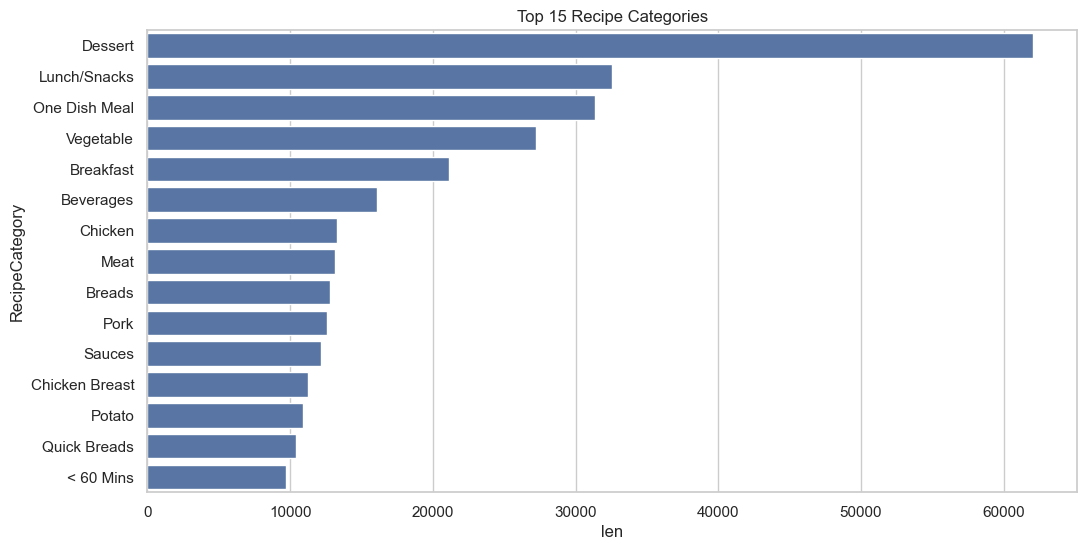

In [5]:
print("\n--- Recipes Schema ---")
print(recipes.schema)

print("\n--- Sample Recipes ---")
print(recipes.head())

if "RecipeCategory" in recipes.columns:
    plt.figure(figsize=(12, 6))
    category_counts = recipes.group_by("RecipeCategory").len().sort("len", descending=True).head(15)
    sns.barplot(data=category_counts.to_pandas(), x="len", y="RecipeCategory")
    plt.title("Top 15 Recipe Categories")
    plt.show()


--- Ratings Distribution ---
shape: (6, 2)
┌────────┬─────────┐
│ Rating ┆ len     │
│ ---    ┆ ---     │
│ i32    ┆ u32     │
╞════════╪═════════╡
│ 0      ┆ 76248   │
│ 1      ┆ 16559   │
│ 2      ┆ 17597   │
│ 3      ┆ 50279   │
│ 4      ┆ 229217  │
│ 5      ┆ 1012082 │
└────────┴─────────┘


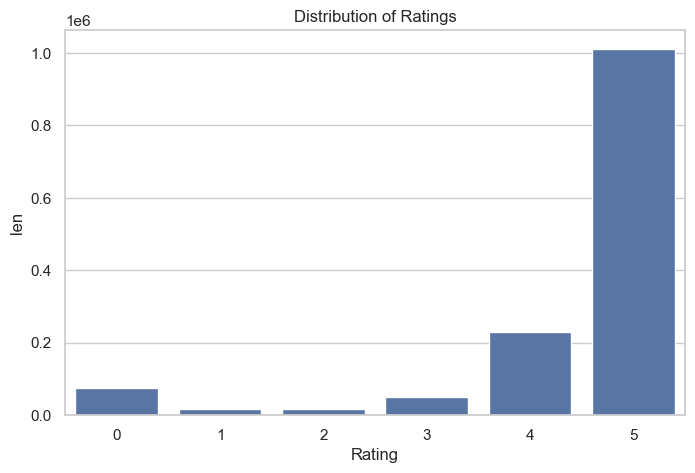

In [6]:
print("\n--- Ratings Distribution ---")
rating_dist = reviews.group_by("Rating").len().sort("Rating")
print(rating_dist)

plt.figure(figsize=(8, 5))
sns.barplot(data=rating_dist.to_pandas(), x="Rating", y="len")
plt.title("Distribution of Ratings")
plt.show()

## Recipe data analysis

In [7]:
recipes.describe().show()

statistic,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
str,f64,str,f64,str,str,str,str,str,str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64
"""count""",522517.0,"""522517""",522517.0,"""522517""","""439972""","""522517""","""522517""","""522517""","""522512""",522516.0,"""521766""",522517.0,522517.0,522517.0,269294.0,275028.0,522517.0,522517.0,522517.0,522517.0,522517.0,522517.0,522517.0,522517.0,522517.0,339606.0,"""174446""",522517.0
"""null_count""",0.0,"""0""",0.0,"""0""","""82545""","""0""","""0""","""0""","""5""",1.0,"""751""",0.0,0.0,0.0,253223.0,247489.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,182911.0,"""348071""",0.0
"""mean""",271821.43697,null,4.5726e7,null,null,null,null,"""2008-01-18 06:34:47.071884+00:…",null,null,null,null,null,null,4.632014,5.227784,484.43858,24.614922,9.559457,86.487003,767.263878,49.089092,3.843242,21.878254,17.46951,8.606191,null,null
"""std""",155495.878422,null,2.9297e8,null,null,null,null,null,null,null,null,null,null,null,0.641934,20.381347,1397.116649,111.485798,46.622621,301.987009,4203.620531,180.822062,8.603163,142.620191,40.128837,114.319809,null,null
"""min""",38.0,"""! Go Cold Turkey With Cucumbe…",27.0,"""- Andy""","""PT1008H""","""PT-1M""","""PT-2M""","""1999-08-06 00:40:00+00:00""","""! DO NOT ATTEMPT IF YOU DO NOT…",null,"""< 15 Mins""",null,null,null,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"""1""",null


In [8]:
recipes.head(2)

RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
f64,str,i32,str,str,str,str,"datetime[μs, UTC]",str,list[str],str,list[str],list[str],list[str],f64,i32,f64,f64,f64,f64,f64,f64,f64,f64,f64,i32,str,list[str]
38.0,"""Low-Fat Berry Blue Frozen Dess…",1533,"""Dancer""","""PT24H""","""PT45M""","""PT24H45M""",1999-08-09 21:46:00 UTC,"""Make and share this Low-Fat Be…","[""https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/YUeirxMLQaeE1h3v3qnM_229%20berry%20blue%20frzn%20dess.jpg"", ""https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/AFPDDHATWzQ0b1CDpDAT_255%20berry%20blue%20frzn%20dess.jpg"", … ""https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/pictzvxW5.jpg""]","""Frozen Desserts""","[""Dessert"", ""Low Protein"", … ""Easy""]","[""4"", ""1⁄4"", … ""1""]","[""blueberries"", ""granulated sugar"", … ""lemon juice""]",4.5,4,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4,null,"[""Toss 2 cups berries with sugar."", ""Let stand for 45 minutes, stirring occasionally."", … ""Pour into plastic mold and freeze overnight. Let soften slightly to serve.""]"
39.0,"""Biryani""",1567,"""elly9812""","""PT25M""","""PT4H""","""PT4H25M""",1999-08-29 13:12:00 UTC,"""Make and share this Biryani re…","[""https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/39/picM9Mhnw.jpg"", ""https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/39/picHv4Ocr.jpg""]","""Chicken Breast""","[""Chicken Thigh & Leg"", ""Chicken"", … ""Stove Top""]","[""1"", ""4"", … ""6""]","[""saffron"", ""milk"", … ""eggs""]",3.0,1,1110.7,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6,null,"[""Soak saffron in warm milk for 5 minutes and puree in blender."", ""Add chiles, onions, ginger, garlic, cloves, peppercorns, cardamom seeds, cinnamon, coriander and cumin seeds, poppy seeds, nutmeg, mace, cilantro or mint leaves and lemon juice. Blend into smooth paste. Put paste into large bowl, add yogurt and mix well."", … ""Add reserved onion as garnish.""]"


## Rating data analysis

In [9]:
reviews.head()

ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified
i32,i32,i32,str,i32,str,"datetime[μs, UTC]","datetime[μs, UTC]"
2,992,2008,"""gayg msft""",5,"""better than any you can get at…",2000-01-25 21:44:00 UTC,2000-01-25 21:44:00 UTC
7,4384,1634,"""Bill Hilbrich""",4,"""I cut back on the mayo, and ma…",2001-10-17 16:49:59 UTC,2001-10-17 16:49:59 UTC
9,4523,2046,"""Gay Gilmore ckpt""",2,"""i think i did something wrong …",2000-02-25 09:00:00 UTC,2000-02-25 09:00:00 UTC
13,7435,1773,"""Malarkey Test""",5,"""easily the best i have ever ha…",2000-03-13 21:15:00 UTC,2000-03-13 21:15:00 UTC
14,44,2085,"""Tony Small""",5,"""An excellent dish.""",2000-03-28 12:51:00 UTC,2000-03-28 12:51:00 UTC


In [10]:
# Polars equivalent for value_counts and proportion calculation
rating_counts = reviews.group_by("Rating").len().sort("Rating")
print(rating_counts)

total_ratings = reviews["Rating"].sum()
reviews_proportion = reviews.with_columns((pl.col("Rating") / total_ratings).alias("proportion"))
reviews_proportion.head()

shape: (6, 2)
┌────────┬─────────┐
│ Rating ┆ len     │
│ ---    ┆ ---     │
│ i32    ┆ u32     │
╞════════╪═════════╡
│ 0      ┆ 76248   │
│ 1      ┆ 16559   │
│ 2      ┆ 17597   │
│ 3      ┆ 50279   │
│ 4      ┆ 229217  │
│ 5      ┆ 1012082 │
└────────┴─────────┘


ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified,proportion
i32,i32,i32,str,i32,str,"datetime[μs, UTC]","datetime[μs, UTC]",f64
2,992,2008,"""gayg msft""",5,"""better than any you can get at…",2000-01-25 21:44:00 UTC,2000-01-25 21:44:00 UTC,8.0908e-7
7,4384,1634,"""Bill Hilbrich""",4,"""I cut back on the mayo, and ma…",2001-10-17 16:49:59 UTC,2001-10-17 16:49:59 UTC,6.4726e-7
9,4523,2046,"""Gay Gilmore ckpt""",2,"""i think i did something wrong …",2000-02-25 09:00:00 UTC,2000-02-25 09:00:00 UTC,3.2363e-7
13,7435,1773,"""Malarkey Test""",5,"""easily the best i have ever ha…",2000-03-13 21:15:00 UTC,2000-03-13 21:15:00 UTC,8.0908e-7
14,44,2085,"""Tony Small""",5,"""An excellent dish.""",2000-03-28 12:51:00 UTC,2000-03-28 12:51:00 UTC,8.0908e-7


In [11]:
## Map with recipe dataa
reviews = reviews.with_columns(pl.col("RecipeId").cast(pl.Int64))
recipes = recipes.with_columns(pl.col("RecipeId").cast(pl.Int64))
recipe_with_review = reviews.join(recipes, on="RecipeId", how="inner")
recipe_with_review.head(1)

ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified,Name,AuthorId_right,AuthorName_right,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
i32,i64,i32,str,i32,str,"datetime[μs, UTC]","datetime[μs, UTC]",str,i32,str,str,str,str,"datetime[μs, UTC]",str,list[str],str,list[str],list[str],list[str],f64,i32,f64,f64,f64,f64,f64,f64,f64,f64,f64,i32,str,list[str]
2,992,2008,"""gayg msft""",5,"""better than any you can get at…",2000-01-25 21:44:00 UTC,2000-01-25 21:44:00 UTC,"""Jalapeno Pepper Poppers""",1545,"""Nancy Van Ess""",null,"""PT30M""","""PT30M""",1999-09-06 04:28:00 UTC,"""Make and share this Jalapeno P…","[""https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/99/2/picAR6FvM.jpg""]","""Vegetable""","[""< 30 Mins"", ""For Large Groups""]","[""8"", ""4"", … null]","[""cream cheese"", ""sharp cheddar cheese"", … ""garlic powder""]",5.0,15,111.4,9.2,4.9,23.7,172.5,3.2,0.6,0.9,4.3,24,null,"[""In a mixing bowl, combine cheeses, bacon and seasonings.; mix well."", ""Spoon about 2 Tbs. into each pepper half."", … ""NOTES : When cutting or seeding hot peppers, use rubber or plastic gloves to protect your hands. avoid touching your face. I omit the bacon in this recipe.""]"


In [12]:
# Ranked list of recipeId by highest sum of rating
ranked_recipes = recipe_with_review.group_by("RecipeCategory").agg(pl.col("Rating").sum().alias("TotalRating")).sort("TotalRating", descending=True)
print(ranked_recipes)
ranked_recipes.head(10).show()

shape: (291, 2)
┌───────────────────┬─────────────┐
│ RecipeCategory    ┆ TotalRating │
│ ---               ┆ ---         │
│ str               ┆ i32         │
╞═══════════════════╪═════════════╡
│ Dessert           ┆ 605020      │
│ One Dish Meal     ┆ 434566      │
│ Lunch/Snacks      ┆ 424157      │
│ Vegetable         ┆ 329075      │
│ Breakfast         ┆ 263177      │
│ …                 ┆ …           │
│ Chicken Crock Pot ┆ 4           │
│ Black Bean Soup   ┆ 3           │
│ Somalian          ┆ 3           │
│ From Scratch      ┆ 0           │
│ Pot Roast         ┆ 0           │
└───────────────────┴─────────────┘


RecipeCategory,TotalRating
str,i32
"""Dessert""",605020
"""One Dish Meal""",434566
"""Lunch/Snacks""",424157
"""Vegetable""",329075
"""Breakfast""",263177


# Preprocessing

In [13]:
import importlib
from src.preprocessing import DataPreprocessor
importlib.reload(importlib.import_module("src.preprocessing"))

<module 'src.preprocessing' from 'd:\\Recipe-Recommender\\notebooks\\..\\src\\preprocessing.py'>

# Baseline A: Gợi ý theo độ phổ biến (Popularity)

Trong phần này, chúng ta sẽ xây dựng baseline đơn giản nhất cho hệ thống gợi ý công thức nấu ăn:
- Gợi ý các công thức có nhiều đánh giá tích cực nhất (rating >= 4).
- Có thể lọc thêm theo thời gian nấu, calories, allergens nếu muốn.

Các bước thực hiện sẽ được giải thích chi tiết bên dưới.

In [14]:
## Handling review level
preprocess_reviews = DataPreprocessor.preprocess_reviews(recipe_with_review)
preprocess_reviews.head(2)

Preprocessing reviews...


ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified,Name,AuthorId_right,AuthorName_right,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions,Relevance
i32,i64,i32,str,i32,str,"datetime[μs, UTC]","datetime[μs, UTC]",str,i32,str,str,str,str,"datetime[μs, UTC]",str,list[str],str,list[str],list[str],list[str],f64,i32,f64,f64,f64,f64,f64,f64,f64,f64,f64,i32,str,list[str],f64
2,992,2008,"""gayg msft""",5,"""better than any you can get at…",2000-01-25 21:44:00 UTC,2000-01-25 21:44:00 UTC,"""Jalapeno Pepper Poppers""",1545,"""Nancy Van Ess""",null,"""PT30M""","""PT30M""",1999-09-06 04:28:00 UTC,"""Make and share this Jalapeno P…","[""https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/99/2/picAR6FvM.jpg""]","""Vegetable""","[""< 30 Mins"", ""For Large Groups""]","[""8"", ""4"", … null]","[""cream cheese"", ""sharp cheddar cheese"", … ""garlic powder""]",5.0,15,111.4,9.2,4.9,23.7,172.5,3.2,0.6,0.9,4.3,24,null,"[""In a mixing bowl, combine cheeses, bacon and seasonings.; mix well."", ""Spoon about 2 Tbs. into each pepper half."", … ""NOTES : When cutting or seeding hot peppers, use rubber or plastic gloves to protect your hands. avoid touching your face. I omit the bacon in this recipe.""]",1.0
7,4384,1634,"""Bill Hilbrich""",4,"""I cut back on the mayo, and ma…",2001-10-17 16:49:59 UTC,2001-10-17 16:49:59 UTC,"""Curry Dip""",1920,"""Ruth Dearing""","""PT2H""","""PT5M""","""PT2H5M""",1999-11-29 23:41:00 UTC,"""Make and share this Curry Dip …",[],"""Weeknight""","[""Refrigerator"", ""< 4 Hours"", ""Easy""]","[""1 1⁄2"", ""1⁄2"", … null]","[""mayonnaise"", ""salt"", … ""Tabasco sauce""]",5.0,3,4.6,0.1,0.0,0.0,291.3,0.9,0.4,0.1,0.2,4,null,"[""Combine all in a bowl and mix thoroughly."", ""Cover and chill at least 2 hours."", ""Use for dip with raw vegetables.""]",1.0


In [15]:
## Split data
train_df, val_df, test_df = DataPreprocessor.split_data(preprocess_reviews)
print(f"Train shape: {train_df.shape}")
print(f"Val shape: {val_df.shape}")
print(f"Test shape: {test_df.shape}")

Splitting data (val_ratio=0.1, test_ratio=0.1)...
Train shape: (1081347, 36)
Val shape: (86259, 36)
Test shape: (26550, 36)


## Bước 1: Lọc các đánh giá tích cực (rating >= 4)
Chúng ta chỉ lấy các đánh giá mà người dùng thực sự thích món ăn (rating từ 4 trở lên). Điều này giúp mô hình tập trung vào các công thức được đánh giá cao.

In [ ]:
# Lọc các đánh giá tích cực (rating >= 4) từ train_df
positive_reviews = train_df.filter(pl.col("Rating") >= 4)
print(f"Tổng số đánh giá trong train: {len(train_df)}")
print(f"Số đánh giá tích cực (>=4): {len(positive_reviews)}")
print(f"Tỉ lệ đánh giá tích cực: {len(positive_reviews)/len(train_df)*100:.1f}%")

## Bước 2: Tính điểm phổ biến cho mỗi công thức
Đếm số lượng đánh giá tích cực cho mỗi RecipeId và sắp xếp theo thứ tự giảm dần để có danh sách công thức phổ biến nhất.

In [ ]:
# Tính điểm phổ biến: số lượng đánh giá tích cực cho mỗi công thức
popularity_scores = positive_reviews.group_by("RecipeId").agg([
    pl.count("Rating").alias("positive_count"),
    pl.mean("Rating").alias("avg_rating")
]).sort("positive_count", descending=True)

print("Top 10 công thức phổ biến nhất:")
popularity_scores.head(10).show()

# Lấy thông tin chi tiết về các công thức này
top_popular_recipes = popularity_scores.join(
    train_df.select(["RecipeId", "Name", "RecipeCategory"]).unique(), 
    on="RecipeId"
).head(10)
print("\nThông tin chi tiết top 10 công thức:")
top_popular_recipes.show()

## Bước 3: Tạo class PopularityRecommender
Tạo class để gợi ý dựa trên độ phổ biến, có thể filter theo thời gian nấu và calories.

In [ ]:
class PopularityRecommender:
    def __init__(self):
        self.popularity_scores = None
        self.recipe_details = None
    
    def fit(self, train_df):
        """Huấn luyện mô hình dựa trên dữ liệu train"""
        # Lọc đánh giá tích cực
        positive_reviews = train_df.filter(pl.col("Rating") >= 4)
        
        # Tính điểm phổ biến
        self.popularity_scores = positive_reviews.group_by("RecipeId").agg([
            pl.count("Rating").alias("positive_count"),
            pl.mean("Rating").alias("avg_rating")
        ]).sort("positive_count", descending=True)
        
        # Lưu thông tin công thức để filter
        self.recipe_details = train_df.select([
            "RecipeId", "Name", "RecipeCategory", "TotalTime", "Calories"
        ]).unique()
        
        print(f"Đã huấn luyện với {len(self.popularity_scores)} công thức")
    
    def recommend(self, n_recommendations=10, max_time_minutes=None, max_calories=None):
        """Gợi ý top N công thức phổ biến với các filter tùy chọn"""
        recommendations = self.popularity_scores.join(self.recipe_details, on="RecipeId")
        
        # Áp dụng filter nếu có
        if max_time_minutes:
            # Chuyển đổi TotalTime từ ISO format (PT30M) sang phút
            recommendations = recommendations.with_columns(
                pl.col("TotalTime").str.extract(r"PT(\d+)M").cast(pl.Int64).alias("time_minutes")
            ).filter(pl.col("time_minutes") <= max_time_minutes)
        
        if max_calories:
            recommendations = recommendations.filter(pl.col("Calories") <= max_calories)
        
        return recommendations.head(n_recommendations)

# Khởi tạo và huấn luyện mô hình
popularity_model = PopularityRecommender()
popularity_model.fit(train_df)

## Bước 4: Test baseline A với các filter khác nhau

In [ ]:
# Test 1: Gợi ý không có filter
print("=== Top 5 công thức phổ biến nhất ===")
recs_basic = popularity_model.recommend(n_recommendations=5)
recs_basic.select(["Name", "positive_count", "avg_rating", "RecipeCategory"]).show()

# Test 2: Filter theo thời gian nấu <= 30 phút
print("\n=== Top 5 công thức nấu nhanh (<= 30 phút) ===")
recs_quick = popularity_model.recommend(n_recommendations=5, max_time_minutes=30)
if len(recs_quick) > 0:
    recs_quick.select(["Name", "positive_count", "time_minutes", "RecipeCategory"]).show()
else:
    print("Không có công thức nào thỏa mãn điều kiện")

# Test 3: Filter theo calories <= 300
print("\n=== Top 5 công thức ít calories (<= 300) ===")
recs_lowcal = popularity_model.recommend(n_recommendations=5, max_calories=300)
if len(recs_lowcal) > 0:
    recs_lowcal.select(["Name", "positive_count", "Calories", "RecipeCategory"]).show()
else:
    print("Không có công thức nào thỏa mãn điều kiện")

# Baseline B: LightFM Hybrid Recommender

Tiếp theo, chúng ta sẽ xây dựng mô hình phức tạp hơn sử dụng LightFM với:
- Input: Ma trận tương tác (user-item) với positive = rating >= 4
- Features: TF-IDF nguyên liệu, đặc trưng dinh dưỡng và thời gian
- Loss: WARP (tối ưu hóa ranking)

In [ ]:
# Cài đặt LightFM và các thư viện cần thiết
!pip install lightfm scikit-learn

In [ ]:
import numpy as np
from lightfm import LightFM
from lightfm.data import Dataset
from lightfm.evaluation import precision_at_k, recall_at_k
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
import pandas as pd

## Bước 1: Chuẩn bị dữ liệu cho LightFM
Tạo ma trận tương tác user-item và features cho items (recipes).

In [ ]:
# Chuyển đổi dữ liệu sang pandas để dễ xử lý
train_pd = train_df.to_pandas()
val_pd = val_df.to_pandas()
test_pd = test_df.to_pandas()

# Lọc chỉ lấy rating >= 4 (positive interactions)
train_positive = train_pd[train_pd['Rating'] >= 4]
val_positive = val_pd[val_pd['Rating'] >= 4]
test_positive = test_pd[test_pd['Rating'] >= 4]

print(f"Train positive interactions: {len(train_positive)}")
print(f"Val positive interactions: {len(val_positive)}")
print(f"Test positive interactions: {len(test_positive)}")

# Tạo mapping cho user và item IDs
all_users = sorted(train_positive['AuthorId'].unique())
all_items = sorted(train_positive['RecipeId'].unique())

user_id_map = {user: i for i, user in enumerate(all_users)}
item_id_map = {item: i for i, item in enumerate(all_items)}

print(f"Số lượng users: {len(all_users)}")
print(f"Số lượng items: {len(all_items)}")

## Bước 2: Tạo item features (TF-IDF nguyên liệu + nutrition)

In [ ]:
# Tạo features cho items (recipes)
recipe_data = train_pd[['RecipeId', 'RecipeIngredientParts', 'Calories', 'TotalTime', 'RecipeCategory']].drop_duplicates()

# TF-IDF cho nguyên liệu
def create_ingredient_text(ingredients_list):
    if pd.isna(ingredients_list) or ingredients_list == []:
        return ""
    if isinstance(ingredients_list, str):
        # Nếu là string, parse nó
        import ast
        try:
            ingredients_list = ast.literal_eval(ingredients_list)
        except:
            return ingredients_list
    return " ".join([str(ing).lower() for ing in ingredients_list if ing])

recipe_data['ingredient_text'] = recipe_data['RecipeIngredientParts'].apply(create_ingredient_text)

# Tạo TF-IDF vectors cho nguyên liệu
tfidf = TfidfVectorizer(max_features=500, stop_words='english')
tfidf_matrix = tfidf.fit_transform(recipe_data['ingredient_text'].fillna(''))

print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")
print(f"Sample ingredients: {list(tfidf.get_feature_names_out())[:10]}")

In [ ]:
# Tạo numeric features (calories, time) và normalize
from sklearn.preprocessing import StandardScaler

numeric_features = recipe_data[['Calories']].fillna(0).values
scaler = StandardScaler()
numeric_features_scaled = scaler.fit_transform(numeric_features)

# Kết hợp TF-IDF với numeric features
from scipy.sparse import hstack
item_features_matrix = hstack([tfidf_matrix, csr_matrix(numeric_features_scaled)])

print(f"Combined features matrix shape: {item_features_matrix.shape}")

# Tạo mapping từ RecipeId sang feature index
recipe_to_idx = {recipe_id: idx for idx, recipe_id in enumerate(recipe_data['RecipeId'])}
print(f"Có {len(recipe_to_idx)} recipes với features")

## Bước 3: Tạo LightFM Dataset và ma trận tương tác

In [ ]:
# Tạo LightFM Dataset
dataset = Dataset()

# Fit với users và items
dataset.fit(users=all_users, items=all_items)

# Tạo ma trận tương tác cho train
def create_interaction_matrix(df, user_id_map, item_id_map):
    interactions = []
    for _, row in df.iterrows():
        user_idx = user_id_map.get(row['AuthorId'])
        item_idx = item_id_map.get(row['RecipeId'])
        if user_idx is not None and item_idx is not None:
            interactions.append((user_idx, item_idx))
    return interactions

train_interactions = create_interaction_matrix(train_positive, user_id_map, item_id_map)
val_interactions = create_interaction_matrix(val_positive, user_id_map, item_id_map)
test_interactions = create_interaction_matrix(test_positive, user_id_map, item_id_map)

# Tạo sparse matrix
train_matrix, _ = dataset.build_interactions(train_interactions)
val_matrix, _ = dataset.build_interactions(val_interactions)
test_matrix, _ = dataset.build_interactions(test_interactions)

print(f"Train matrix shape: {train_matrix.shape}")
print(f"Train matrix density: {train_matrix.nnz / (train_matrix.shape[0] * train_matrix.shape[1]) * 100:.4f}%")

## Bước 4: Huấn luyện LightFM với WARP loss

In [ ]:
# Huấn luyện LightFM model với WARP loss
model = LightFM(
    loss='warp',  # WARP loss tối ưu cho ranking
    no_components=64,  # Embedding dimension
    learning_rate=0.05,
    random_state=42
)

# Huấn luyện model
import time
start_time = time.time()
model.fit(train_matrix, epochs=30, verbose=True)
training_time = time.time() - start_time

print(f"Thời gian huấn luyện: {training_time:.2f} giây")

## Bước 5: Đánh giá và so sánh các baseline

In [ ]:
# Đánh giá LightFM model
train_precision = precision_at_k(model, train_matrix, k=10).mean()
train_recall = recall_at_k(model, train_matrix, k=10).mean()

val_precision = precision_at_k(model, val_matrix, k=10, train_interactions=train_matrix).mean()
val_recall = recall_at_k(model, val_matrix, k=10, train_interactions=train_matrix).mean()

print("=== Kết quả đánh giá LightFM ===")
print(f"Train Precision@10: {train_precision:.4f}")
print(f"Train Recall@10: {train_recall:.4f}")
print(f"Val Precision@10: {val_precision:.4f}")
print(f"Val Recall@10: {val_recall:.4f}")

# Tạo một vài gợi ý mẫu từ LightFM
def get_lightfm_recommendations(model, user_id, user_id_map, item_id_map, recipe_data, n_items=10):
    user_idx = user_id_map.get(user_id)
    if user_idx is None:
        return None
    
    # Lấy scores cho tất cả items
    scores = model.predict(user_idx, list(range(len(item_id_map))))
    
    # Sắp xếp và lấy top N
    item_indices = np.argsort(-scores)[:n_items]
    
    # Chuyển đổi về RecipeId
    reverse_item_map = {v: k for k, v in item_id_map.items()}
    recommended_items = [reverse_item_map[idx] for idx in item_indices if idx in reverse_item_map]
    
    # Lấy thông tin recipes
    rec_info = recipe_data[recipe_data['RecipeId'].isin(recommended_items)][['RecipeId', 'RecipeCategory']]
    return rec_info

# Test với một user mẫu
sample_user = all_users[0]
lightfm_recs = get_lightfm_recommendations(model, sample_user, user_id_map, item_id_map, train_pd)
print(f"\n=== Gợi ý LightFM cho User {sample_user} ===")
if lightfm_recs is not None:
    print(lightfm_recs.head())

# Nâng cấp: Candidate Generation + Ranking Pipeline

Dựa trên kết quả của các baseline, chúng ta có thể nâng cấp hệ thống với pipeline 2 giai đoạn:
1. **Candidate Generation**: Sử dụng LightFM để tạo ra 500-2000 candidates
2. **Re-ranking**: Sử dụng XGBoost/CatBoost để ranking lại với nhiều features hơn

In [ ]:
# Cài đặt XGBoost cho ranking
!pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.metrics.pairwise import cosine_similarity

class TwoStageRecommender:
    def __init__(self, lightfm_model, user_id_map, item_id_map, recipe_data, tfidf_matrix):
        self.lightfm_model = lightfm_model
        self.user_id_map = user_id_map
        self.item_id_map = item_id_map
        self.recipe_data = recipe_data
        self.tfidf_matrix = tfidf_matrix
        self.ranker = None
    
    def generate_candidates(self, user_id, n_candidates=500):
        """Stage 1: Candidate Generation với LightFM"""
        user_idx = self.user_id_map.get(user_id)
        if user_idx is None:
            return []
        
        # Lấy scores cho tất cả items
        scores = self.lightfm_model.predict(user_idx, list(range(len(self.item_id_map))))
        
        # Lấy top N candidates
        item_indices = np.argsort(-scores)[:n_candidates]
        reverse_item_map = {v: k for k, v in self.item_id_map.items()}
        candidates = [(reverse_item_map[idx], scores[idx]) for idx in item_indices if idx in reverse_item_map]
        
        return candidates
    
    def create_ranking_features(self, user_id, candidate_items, user_history):
        """Tạo features cho ranking stage"""
        features = []
        
        for item_id, retrieval_score in candidate_items:
            feature_vector = []
            
            # 1. Score từ retrieval model
            feature_vector.append(retrieval_score)
            
            # 2. Popularity (số lượng rating tích cực)
            item_popularity = len(user_history[user_history['RecipeId'] == item_id])
            feature_vector.append(item_popularity)
            
            # 3. Recipe category encoding (giả sử có thông tin category)
            recipe_info = self.recipe_data[self.recipe_data['RecipeId'] == item_id]
            if not recipe_info.empty:
                calories = recipe_info['Calories'].iloc[0] if not pd.isna(recipe_info['Calories'].iloc[0]) else 0
                feature_vector.append(calories)
            else:
                feature_vector.append(0)
            
            # 4. Novelty (1 / (popularity + 1))
            novelty = 1.0 / (item_popularity + 1)
            feature_vector.append(novelty)
            
            features.append(feature_vector)
        
        return np.array(features)
    
    def train_ranker(self, training_data):
        """Huấn luyện XGBoost ranker"""
        # Tạo dữ liệu training cho ranker
        # (Đây là phần simplified, trong thực tế cần nhiều dữ liệu hơn)
        X_train = []
        y_train = []
        
        # Giả lập dữ liệu training (normally bạn sẽ cần tạo từ validation set)
        for i, user_id in enumerate(list(self.user_id_map.keys())[:100]):  # Sample 100 users
            candidates = self.generate_candidates(user_id, 50)
            if candidates:
                user_history = training_data[training_data['AuthorId'] == user_id]
                features = self.create_ranking_features(user_id, candidates[:10], user_history)
                X_train.extend(features)
                
                # Label: 1 if user actually interacted, 0 otherwise
                for item_id, _ in candidates[:10]:
                    label = 1 if len(user_history[user_history['RecipeId'] == item_id]) > 0 else 0
                    y_train.append(label)
        
        if len(X_train) > 0:
            X_train = np.array(X_train)
            y_train = np.array(y_train)
            
            self.ranker = xgb.XGBRanker(
                objective='rank:pairwise',
                eval_metric=['ndcg'],
                n_estimators=100,
                learning_rate=0.1,
                random_state=42
            )
            
            # Group information for ranking (mỗi user là một group)
            group_sizes = [10] * (len(X_train) // 10)  # Mỗi user có 10 candidates
            
            self.ranker.fit(X_train, y_train, group=group_sizes)
            print("Đã huấn luyện XGBoost ranker")
        else:
            print("Không đủ dữ liệu để huấn luyện ranker")
    
    def recommend(self, user_id, n_recommendations=10):
        """Pipeline đầy đủ: Candidate generation + Ranking"""
        # Stage 1: Generate candidates
        candidates = self.generate_candidates(user_id, n_candidates=500)
        
        if not candidates:
            return []
        
        # Stage 2: Re-rank với XGBoost
        if self.ranker is not None:
            user_history = self.recipe_data  # Simplified
            features = self.create_ranking_features(user_id, candidates[:50], user_history)
            scores = self.ranker.predict(features)
            
            # Kết hợp với candidate items
            ranked_candidates = [(candidates[i][0], scores[i]) for i in range(len(scores))]
            ranked_candidates.sort(key=lambda x: x[1], reverse=True)
            
            return ranked_candidates[:n_recommendations]
        else:
            # Nếu chưa có ranker, trả về top candidates từ LightFM
            return candidates[:n_recommendations]

# Khởi tạo two-stage recommender
two_stage_model = TwoStageRecommender(model, user_id_map, item_id_map, train_pd, tfidf_matrix)

# Huấn luyện ranker
two_stage_model.train_ranker(train_positive)

## Test và so sánh tất cả các mô hình

In [ ]:
# So sánh các mô hình với một user mẫu
test_user = all_users[5]
print(f"=== So sánh các mô hình cho User {test_user} ===\n")

# 1. Baseline A: Popularity
print("1. BASELINE A - POPULARITY RECOMMENDER:")
pop_recs = popularity_model.recommend(n_recommendations=5)
if len(pop_recs) > 0:
    print(pop_recs.select(["Name", "positive_count", "RecipeCategory"]).head().to_pandas())
else:
    print("Không có gợi ý từ popularity model")

# 2. Baseline B: LightFM
print("\n2. BASELINE B - LIGHTFM HYBRID:")
lightfm_recs = get_lightfm_recommendations(model, test_user, user_id_map, item_id_map, train_pd, 5)
if lightfm_recs is not None:
    print(lightfm_recs.head())
else:
    print("Không có gợi ý từ LightFM model")

# 3. Two-stage model
print("\n3. TWO-STAGE MODEL (CANDIDATE GENERATION + RANKING):")
two_stage_recs = two_stage_model.recommend(test_user, 5)
if two_stage_recs:
    print("RecipeId | Score")
    for recipe_id, score in two_stage_recs:
        recipe_name = train_pd[train_pd['RecipeId'] == recipe_id]['Name'].iloc[0] if len(train_pd[train_pd['RecipeId'] == recipe_id]) > 0 else "Unknown"
        print(f"{recipe_id} | {score:.4f} | {recipe_name[:50]}...")
else:
    print("Không có gợi ý từ two-stage model")

print("\n=== Tóm tắt so sánh ===")
print("- Baseline A (Popularity): Đơn giản, nhanh, phù hợp cho cold-start")
print("- Baseline B (LightFM): Cá nhân hóa tốt hơn, hybrid features giảm cold-start")  
print("- Two-stage: Kết hợp ưu điểm của cả hai, có thể scale tốt với dữ liệu lớn")

## Kết luận và Hướng phát triển tiếp theo

### Đã hoàn thành:
1. ✅ **Baseline A (Popularity)**: Gợi ý theo độ phổ biến + filters
2. ✅ **Baseline B (LightFM)**: Hybrid model với WARP loss  
3. ✅ **Two-stage Pipeline**: Candidate Generation + XGBoost Ranking

### Hướng phát triển tiếp theo:
1. **Tối ưu hyperparameters**: Grid search cho LightFM (embedding_dim, learning_rate, epochs)
2. **Thêm features**: User profile, temporal features, content similarity
3. **Đánh giá offline**: Implement NDCG@K, MAP@K trên test set
4. **A/B testing**: So sánh hiệu quả trên dữ liệu thực
5. **Cold-start handling**: Specialized strategy cho user/item mới

### Khuyến nghị triển khai:
- **Production đầu tiên**: Sử dụng Baseline A (đơn giản, ổn định)
- **Nâng cấp dần**: LightFM → Two-stage khi có nhiều dữ liệu hơn
- **Monitoring**: Track precision, recall, diversity, novelty metrics